In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

In [2]:
data=pd.read_csv("Processed-nhanes3.csv")

In [3]:
data.columns

Index(['agestrat', 'sex', 'ses', 'hf', 'stroke', 'mi', 'fast', 'metabolic',
       'mortstat', 'race_hispanic', 'race_multiracial',
       'race_non hispanic black', 'race_non hispanic white'],
      dtype='object')

In [4]:
data1 = data[(data['agestrat'] == 3) & (data['mortstat'] == 'dead')].sample(964)
data = pd.concat([data[(data['agestrat'] == 3) & (data['mortstat'] == 'alive')], data1], ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 13 columns):
agestrat                   1928 non-null int64
sex                        1928 non-null int64
ses                        1928 non-null int64
hf                         1928 non-null int64
stroke                     1928 non-null int64
mi                         1928 non-null int64
fast                       1928 non-null int64
metabolic                  1928 non-null int64
mortstat                   1928 non-null object
race_hispanic              1928 non-null int64
race_multiracial           1928 non-null int64
race_non hispanic black    1928 non-null int64
race_non hispanic white    1928 non-null int64
dtypes: int64(12), object(1)
memory usage: 195.9+ KB


In [5]:
Y = data['mortstat']

In [6]:
del data['mortstat']

In [7]:
X = data

In [8]:
X.shape

(1928, 12)

In [9]:
Y = np.ravel(Y)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=1)

In [11]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

In [12]:
max_features = ['auto', 'sqrt']

In [13]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

In [14]:
min_samples_split = [2, 5, 10]

In [15]:
min_samples_leaf = [1, 2, 3, 4, 5]

In [16]:
bootstrap = [True, False]

In [17]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [18]:
random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'bootstrap': [True, False]}

In [19]:
rf = RandomForestClassifier(random_state = 2)

In [20]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [21]:
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   57.9s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [22]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [23]:
rf_best = rf_random.best_estimator_

In [24]:
rf_best.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [25]:
rf_best.score(xtest, ytest)

0.6243523316062176

In [26]:
ypred = rf_best.predict(xtest)

In [27]:
yscore = rf_best.predict_proba(xtest)

In [28]:
cm = confusion_matrix(ytest, ypred)

In [29]:
cm

array([[104,  96],
       [ 49, 137]])

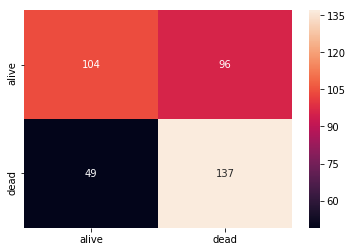

In [30]:
import seaborn as sns
labelname = rf_best.classes_
sns.heatmap(cm, annot=True,  fmt='', xticklabels=labelname, yticklabels=labelname)

In [31]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       alive       0.68      0.52      0.59       200
        dead       0.59      0.74      0.65       186

   micro avg       0.62      0.62      0.62       386
   macro avg       0.63      0.63      0.62       386
weighted avg       0.64      0.62      0.62       386



In [32]:
np.unique(Y, return_counts=True)

(array(['alive', 'dead'], dtype=object), array([964, 964]))

In [33]:
rf_best.feature_importances_

array([0.        , 0.20074806, 0.09786119, 0.07900072, 0.11032327,
       0.15461046, 0.07799685, 0.08806001, 0.06611382, 0.03054223,
       0.05451128, 0.04023211])

In [34]:
sorted(zip(rf_best.feature_importances_, X.columns), key=lambda x: x[0],reverse=True)

[(0.20074805976976498, 'sex'),
 (0.15461045589357839, 'mi'),
 (0.11032326981361934, 'stroke'),
 (0.09786118858513239, 'ses'),
 (0.08806001183331, 'metabolic'),
 (0.07900072102643316, 'hf'),
 (0.07799684802975058, 'fast'),
 (0.06611382203914973, 'race_hispanic'),
 (0.05451128366603053, 'race_non hispanic black'),
 (0.04023211416371495, 'race_non hispanic white'),
 (0.030542225179516217, 'race_multiracial'),
 (0.0, 'agestrat')]

In [35]:
fpr, tpr, thresholds = roc_curve(ytest, yscore[:,0])
roc_auc = auc(ytest, yscore)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

ValueError: Data is not binary and pos_label is not specified

In [49]:
yscore[:,0]

array([0.98557722, 0.88611904, 0.96379347, ..., 0.28591729, 0.78281325,
       0.82452134])

In [53]:
[1 if ytest=='alive' else 0]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()